# 画像生成 AI 入門: Python による拡散モデルの理論と実践

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shunk031/coloso-python-diffusion-models/blob/main/lectures/section-03-08.ipynb)

## Section 03: Basics of Diffusion Model

最先端の画像生成 AI である拡散モデル (diffusion model) の基礎について導入します。

### Lecture 08: Score-based Generative Model

拡散モデルと関係性が深いスコアベースの生成モデルのうち、[Score-Based Generative Modeling through Stochastic Differential Equations (Score SDE)](https://arxiv.org/abs/2011.13456) を `diffusers` で実際に動かしてみます。

## セットアップ

### GPU が使用できるか確認

本 Colab ノートブックを実行するために GPU ランタイムを使用していることを確認します。CPU ランタイムと比べて画像生成がより早くなります。以下の `nvidia-smi` コマンドが失敗する場合は再度講義資料の `GPU 使用設定` のスライド説明や Google Colab の [FAQ](https://research.google.com/colaboratory/faq.html#gpu-utilization) 等を参考にランタイムタイプが正しく変更されているか確認してください。

In [ ]:
!nvidia-smi

Mon Aug 21 08:02:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 利用する Python ライブラリをインストール

diffusers ライブラリをインストールすることで拡散モデルを簡単に使用できるようにします。diffusers ライブラリを動かす上で必要となライブラリも追加でインストールします:
  - [accelerate](https://github.com/huggingface/accelerate): transformers と連携してより高速な画像生成をサポートするライブラリ


In [ ]:
!pip install diffusers==0.16.1
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.1 MB/s eta 0:00:00


## Score SDE を扱うパイプラインを構築

今回使用する diffusers に用意されている `ScoreSdeVePipeline` は数行のコードでスコアベース生成モデルである Score SDE を使って画像を生成できるパイプラインです。以下のコードを実行することでパイプラインは学習済みのモデルをダウンロードします。 500 MB ほど huggingface のサーバからデータがダウンロードされるので少し待ちます。

今回は noise conditioned score network (NCSN) である Score SDE を用いてハリウッドスターの顔画像を生成するように学習した `google/ncsnpp-ffhq-1024` を指定しました。この他にも Score SDE 用に学習された重みがいくつか google から公開されています: [NCSNPP Models - Hugging Face](https://huggingface.co/models?library=diffusers&pipeline_tag=unconditional-image-generation&sort=downloads&search=ncsnpp)

In [ ]:
from diffusers import ScoreSdeVePipeline

model_id = "google/ncsnpp-ffhq-1024"

sde_ve = ScoreSdeVePipeline.from_pretrained(model_id)
sde_ve = sde_ve.to("cuda")

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Score SDE パイプラインで画像を生成する準備が整いました。以下を実行して画像を生成します。

In [ ]:
output = sde_ve()

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/resnet.py:368: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(kernel, device=hidden_states.device),
/usr/local/lib/python3.10/dist-packages/diffusers/models/resnet.py:294: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(kernel, device=hidden_states.device),


ハリウッドスターとして存在しそうな顔が生成されました。以下の画像は 1024 x 1024 の解像度を持ちます。

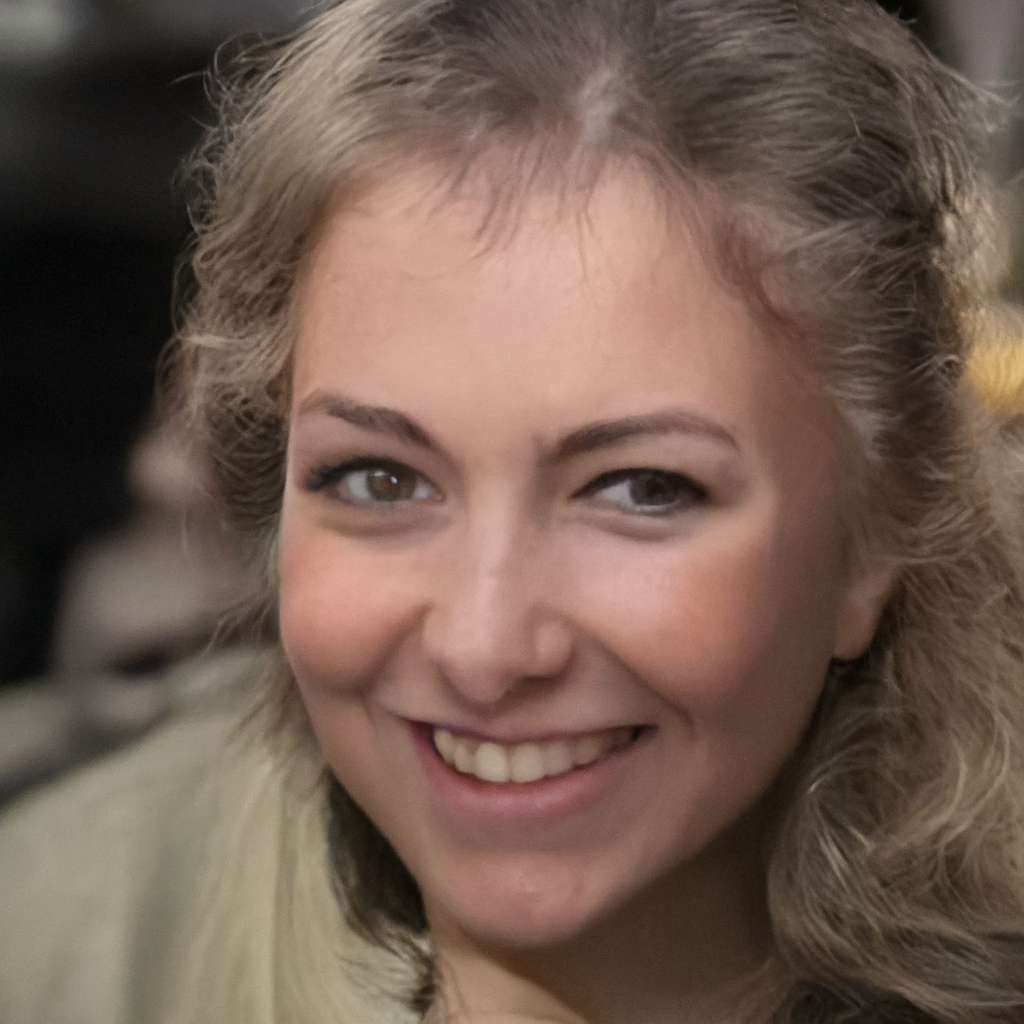

In [ ]:
output.images[0]